In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, vectorize, stencil

# 4.2 Expectation Value → 0.9 gaussian

0.9


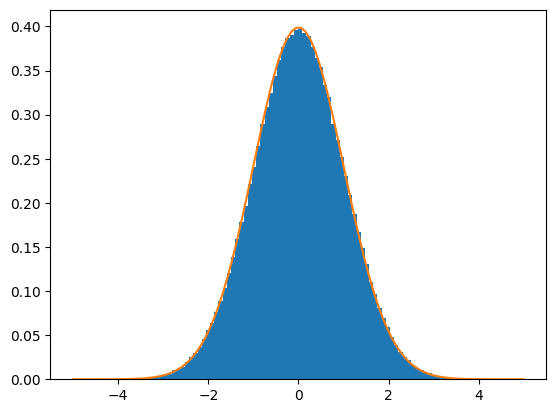

In [34]:
sqrt = np.sqrt
pi = np.pi
exp = np.exp

step = 0.5
K = 1_000_000
dx_rand = np.random.rand(K)
metro_rand = np.random.rand(K)
accept = np.full(K, False)
x = np.full(K, np.nan)
x[0] = 0.0

for k in range(1, K):
    init = 0.5 * x[k - 1] ** 2  # 0.5⋅x²
    dx = (dx_rand[k] - 0.5) * step * 2.0  # ±step
    x[k] = x[k - 1] + dx  # new x
    fin = 0.5 * x[k] ** 2.0  # new 0.5⋅x²
    accept[k] = exp(init - fin) > metro_rand[k]  # metro test
    x[k] = x[k] if accept[k] else x[k - 1]

print(accept[1:].sum() / K)

plt.hist(x, 100, density=True)

x = np.linspace(-5, 5, 100)
y = 1 / sqrt(2 * pi) * exp(-(x**2) / 2)
plt.plot(x, y);

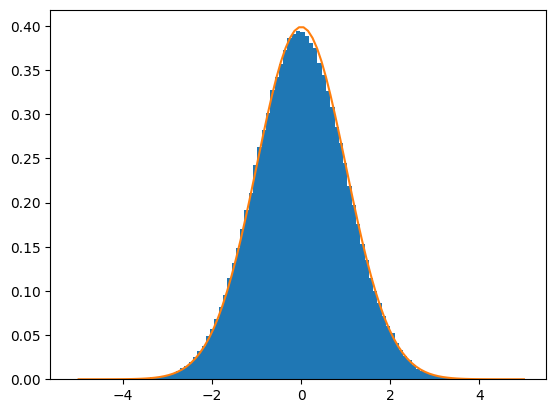

In [33]:
sqrt = np.sqrt
pi = np.pi
exp = np.exp


@njit
def run(K=10_000):
    step = 0.5

    dx_rand = np.random.rand(K)
    metro_rand = np.random.rand(K)
    accept = np.full(K, False)
    x = np.full(K, np.nan)
    x[0] = 0.0

    for k in range(1, K):
        init = 0.5 * x[k - 1] ** 2  # 0.5⋅x²
        dx = (dx_rand[k] - 0.5) * step * 2.0  # ±step
        x[k] = x[k - 1] + dx  # new x
        fin = 0.5 * x[k] ** 2.0  # new 0.5⋅x²
        accept[k] = exp(init - fin) > metro_rand[k]  # metro test
        x[k] = x[k] if accept[k] else x[k - 1]

    return x, accept[1:].sum() / K


data, _ = run(K=1_000_000)

plt.hist(data, 100, density=True)
x = np.linspace(-5, 5, 100)
y = 1 / sqrt(2 * pi) * exp(-(x**2) / 2)
plt.plot(x, y);

# 4.4

$$
P(x)=\frac{e^{-0.5⋅(x-3)^2}+e^{-0.5⋅(x+3)^2}}{2\sqrt{2π}} \tag{4.14}
$$

$$
S(x)=-log(e^{-0.5⋅(x-3)^2}+e^{-0.5⋅(x+3)^2}) \tag{4.15}
$$

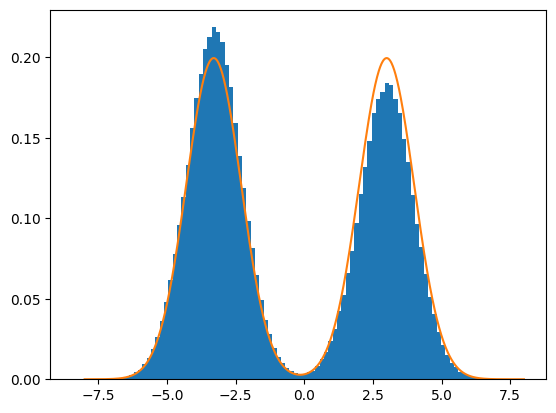

In [31]:
sqrt = np.sqrt
pi = np.pi
exp = np.exp
log = np.log

shift = 3.3


@njit
def run(K=10_000):
    step = 0.5

    dx_rand = np.random.rand(K)
    metro_rand = np.random.rand(K)
    accept = np.full(K, False)
    x = np.full(K, np.nan)
    x[0] = 0.0

    for k in range(1, K):
        init = -log(
            exp(-0.5 * (x[k - 1] - 3.0) ** 2) + exp(-0.5 * (x[k - 1] + shift) ** 2)
        )
        dx = (dx_rand[k] - 0.5) * step * 2.0  # ±step
        x[k] = x[k - 1] + dx  # new x
        fin = -log(exp(-0.5 * (x[k] - 3.0) ** 2) + exp(-0.5 * (x[k] + shift) ** 2))
        accept[k] = exp(init - fin) > metro_rand[k]  # metro test
        x[k] = x[k] if accept[k] else x[k - 1]

    return x, accept[1:].sum() / K


data, score = run(1_000_000)

x = np.linspace(-8, 8, 1_000)
y = (exp(-0.5 * (x - 3) ** 2) + exp(-0.5 * (x + shift) ** 2)) / (2 * sqrt(2 * pi))

plt.hist(data, 100, density=True)
plt.plot(x, y);